In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
from datetime import datetime
import plotly.express as px
import itertools
from pylab import rcParams
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ls'/content/gdrive/My Drive/Thesis'

dataframe_dma_flow_1D.csv       dataframe_flow_variable_60min.csv
dataframe_dma_flow_60min.csv    DMA_225.csv
dataframe_flow_1D.csv           DMA_468.csv
dataframe_flow_variable_1D.csv  persistence_results.pkl


In [4]:
data = pd.read_csv("/content/gdrive/My Drive/Thesis/DMA_468.csv")
data['Date-time'] = pd.to_datetime(data['Date-time'], dayfirst=True, errors='coerce')
data.rename( columns={'Flow':'DMA_468','Date-time':'Date_time'}, inplace=True )
data_DMA468 = data[['Date_time','DMA_468']]

In [5]:
figure = px.line(data_DMA468,x="Date_time",y="DMA_468",title="DMA_468 with slider")
figure.update_xaxes(rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="12m",
                     step="month",
                     stepmode="backward"),
                dict(count=2,
                     label="8m",
                     step="month",
                     stepmode="backward"),
                dict(count=3,
                     label="4m",
                     step="month",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        )
    )
figure.show()

In [6]:
data_DMA468_indexed = data_DMA468.set_index('Date_time')
hourly_data = data_DMA468_indexed.resample('h').sum()

In [7]:
# Baseline model : Persistence model

# Making a df
Original = hourly_data["DMA_468"].to_frame().rename(columns = {"DMA_468": "Original" })
Forecast  = hourly_data["DMA_468"].to_frame().shift(1).rename(columns = {"DMA_468": "Forecast" })
baseline = pd.concat([Original,Forecast],axis=1)
final = baseline[1:]#there is no prediction for first row due to shifting.
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(final.Original, final.Forecast))
rmse = round(rmse, 3)
print (" The root mean square value on dataset: ",rmse)

 The root mean square value on dataset:  0.923


<Figure size 1584x720 with 0 Axes>

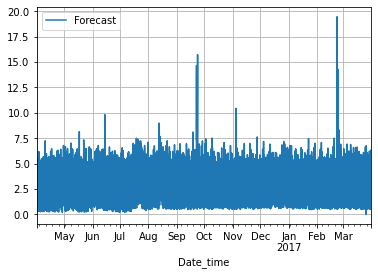

<Figure size 1584x720 with 0 Axes>

In [8]:
baseline_model = final[['Forecast']]
baseline_model.plot(grid=True)

plt.figure(figsize=(22,10))

In [9]:
final.head(3)

,Original,Forecast
Date_time,,
2016-04-01 01:00:00,0.389,0.534
2016-04-01 02:00:00,0.444,0.389
2016-04-01 03:00:00,0.455,0.444


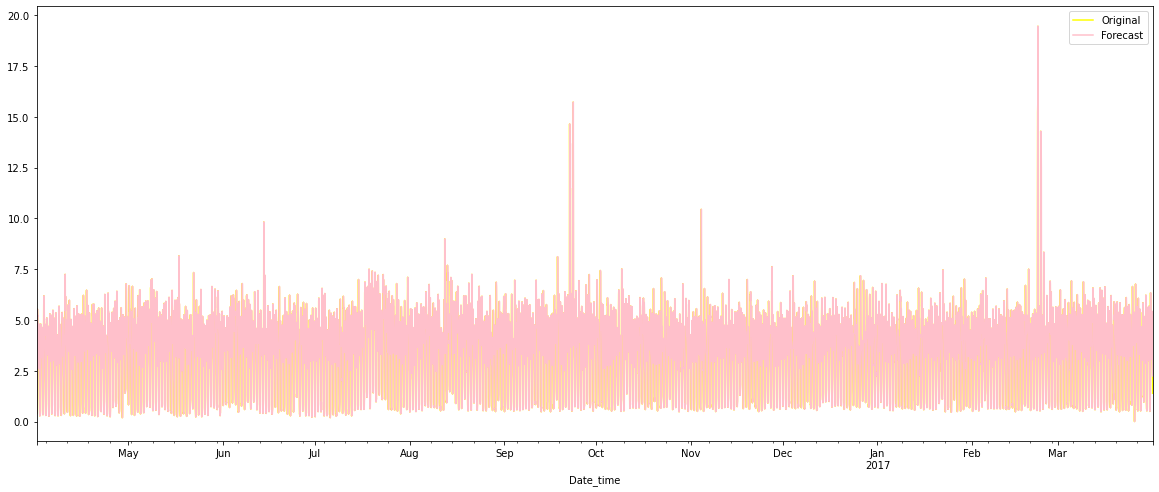

In [10]:
final.plot(figsize=(20,8), color=['yellow', 'pink'])

In [18]:
baseline_graph = final[-1059:]
rmse1 = np.sqrt(mean_squared_error(baseline_graph.Original, baseline_graph.Forecast))
rmse1 = round(rmse1, 3)
print (" The root mean square value on dataset using baseline model: ",rmse1)

 The root mean square value on dataset using baseline model:  1.084


In [19]:
bg = baseline_graph.reset_index()
bg.head(2)

,Date_time,Original,Forecast
0,2017-02-15 21:00:00,3.411,4.655
1,2017-02-15 22:00:00,2.800,3.411


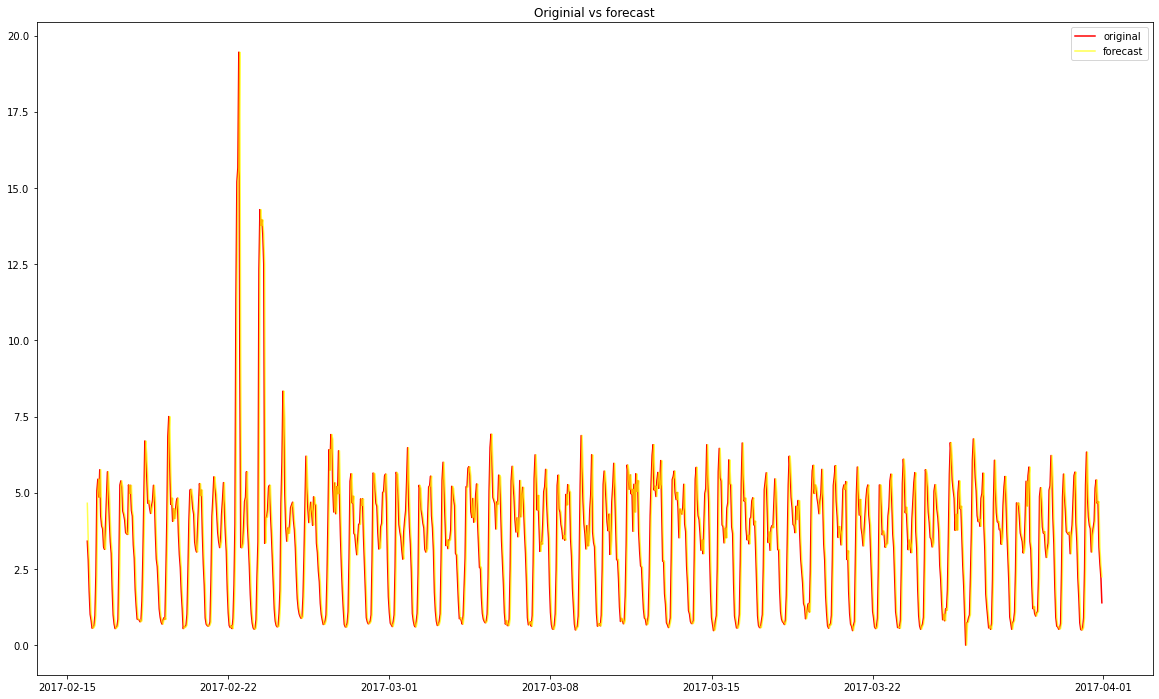

In [17]:
# Plotting original and predicted graph:
plt.figure(figsize=(20, 12))
plt.plot(bg.Date_time, bg.Original, color='red', label='original')
plt.plot(bg.Date_time, bg.Forecast, color='yellow', label='forecast', alpha=0.7)
plt.title('Originial vs forecast')
plt.legend()
plt.show()